In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df_pyglet = pd.read_csv("pyglet_results.csv")
print(df_pyglet.shape)
df_sensor = pd.read_csv("sensor_results.csv")
print(df_sensor.shape)

(500, 2)
(12, 2)


In [3]:
# Start from first pause to sync
first_pause = df_pyglet['timestamp'][df_pyglet['timestamp'].diff() > 0.5].values[0]
df_pyglet = df_pyglet[df_pyglet['timestamp'] >= first_pause]
df_sensor = df_sensor[df_sensor['timestamp'] >= first_pause]

# Ignore sensor results after last pyglet timestamp
last_pyglet = df_pyglet['timestamp'].values[-1]
df_sensor = df_sensor[df_sensor['timestamp'] <= last_pyglet]

In [4]:
# Interactive
%matplotlib qt

first_pause = df_pyglet['timestamp'][df_pyglet['timestamp'].diff() > 0.5].values[0]
plt.plot(df_pyglet['timestamp'], df_pyglet['value'], label='Pyglet')
plt.plot(df_sensor['timestamp'], df_sensor['value'], label='Sensor', marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

<Axes: >

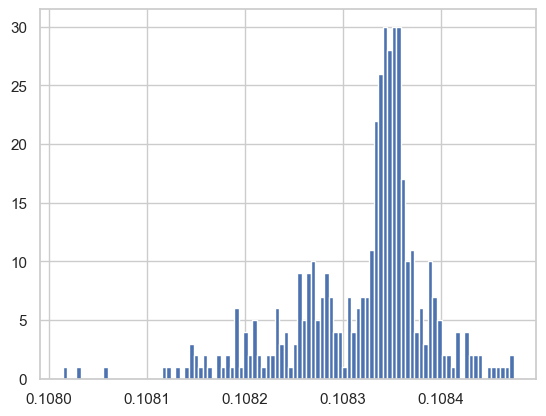

In [13]:
%matplotlib inline

df_pyglet['timestamp_diff'] = df_pyglet['timestamp'].diff().fillna(0)
df_pyglet['timestamp_diff'][df_pyglet['timestamp_diff'] < 0.5].iloc[1:].hist(bins=100)

In [14]:
df_sensor.shape

(0, 2)

<Axes: >

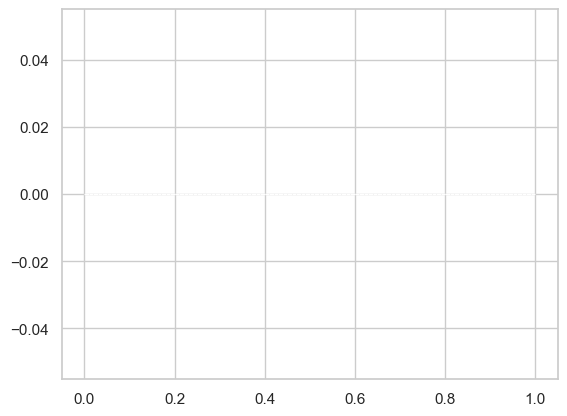

In [15]:
%matplotlib inline

df_sensor['timestamp_diff'] = df_sensor['timestamp'].diff().fillna(0)
df_sensor['timestamp_diff'][df_sensor['timestamp_diff'] < 1].iloc[1:].hist(bins=100)

In [ ]:
df_sensor[df_sensor['timestamp_diff'] < 0.1]

,timestamp,value,timestamp_diff


: 